---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [67]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey


In [68]:
import pandas as pd
df6 = pd.DataFrame(friends_chars['MONICA'])
df5 = pd.DataFrame(friends_chars['ROSS'])

df4 = pd.DataFrame(friends_chars['RACHEL'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])

df2 = pd.DataFrame(friends_chars['JOEY'])
df1 = pd.DataFrame(friends_chars['CHANDLER'])

In [69]:
df1.head()

,0
0,"Huh. (They all leave, dejected)\n"
1,Morning.\n
2,"Yeah, like there's any way I could ever do tha..."
3,"Hey, you know what, here's a thought. Why don'..."
4,I can not believe that I am going out with som...


In [70]:
df1.shape

(5086, 1)

In [71]:
listOfScores1 = ['Chandler'] *df1.shape[0]
listOfScores2 = ['Joey'] *df2.shape[0]
listOfScores3 = ['Phoebe'] *df3.shape[0]
listOfScores4 = ['Rachel'] *df4.shape[0]
listOfScores5 = ['Ross'] *df5.shape[0]
listOfScores6 = ['Monica'] *df6.shape[0]


In [72]:
df1['Score'] = listOfScores1
df2['Score'] = listOfScores2 
df3['Score'] = listOfScores3
df4['Score'] = listOfScores4
df5['Score'] = listOfScores5
df6['Score'] = listOfScores6


In [73]:
df1=df1.rename(columns={0: 'dialogue'})
df2=df2.rename(columns={0: 'dialogue'})
df3=df3.rename(columns={0: 'dialogue'})
df4=df4.rename(columns={0: 'dialogue'})
df5=df5.rename(columns={0: 'dialogue'})
df6=df6.rename(columns={0: 'dialogue'})

In [74]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df.tail()

,dialogue,Score
4975,(Angrily.) You can let some of them go by!(Jud...,Monica
4976,(Awkwardly.) Why would I care where Chandler i...,Monica
4977,Stupid.\n,Monica
4978,What were we thinking?\n,Monica
4979,Oh yeah. Definitely.\n,Monica


In [75]:
from io import StringIO
col = ['Score', 'dialogue']
df = df[col]
df = df[pd.notnull(df['dialogue'])]
df.columns = ['Score', 'dialogue']
df['category_id'] = df['Score'].factorize()[0]
category_id_df = df[['Score', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Score']].values)
df.tail()


,Score,dialogue,category_id
4975,Monica,(Angrily.) You can let some of them go by!(Jud...,5
4976,Monica,(Awkwardly.) Why would I care where Chandler i...,5
4977,Monica,Stupid.\n,5
4978,Monica,What were we thinking?\n,5
4979,Monica,Oh yeah. Definitely.\n,5


In [76]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [53]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('dialogue').Score.count().plot.bar(ylim=0)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1458a5d08> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1458b56a8> (for post_execute):



KeyboardInterrupt



In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.dialogue).toarray()
labels = df.Score
features.shape

(30010, 5750)

In [78]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Score, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Score))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Chandler':
  . Most correlated unigrams:
. hardly
. zoo
  . Most correlated bigrams:
. hasn called
. having fight
# 'Joey':
  . Most correlated unigrams:
. hardly
. zoo
  . Most correlated bigrams:
. hasn called
. having fight
# 'Monica':
  . Most correlated unigrams:
. hardly
. zoo
  . Most correlated bigrams:
. hasn called
. having fight
# 'Phoebe':
  . Most correlated unigrams:
. hardly
. zoo
  . Most correlated bigrams:
. hasn called
. having fight
# 'Rachel':
  . Most correlated unigrams:
. hardly
. zoo
  . Most correlated bigrams:
. hasn called
. having fight
# 'Ross':
  . Most correlated unigrams:
. hardly
. zoo
  . Most correlated bigrams:
. hasn called
. having fight


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['dialogue'], df['Score'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [80]:
print(clf.predict(count_vect.transform(["Yeah, well you promised Barry, you d marry him. (Rachel glares at her, and she retreats to safety between Richards legs)"])))

['Rachel']


In [81]:
print(clf.predict(count_vect.transform(["And I will be using his dead body as a shield"])))

['Joey']


In [82]:
!pip3 install seaborn


You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

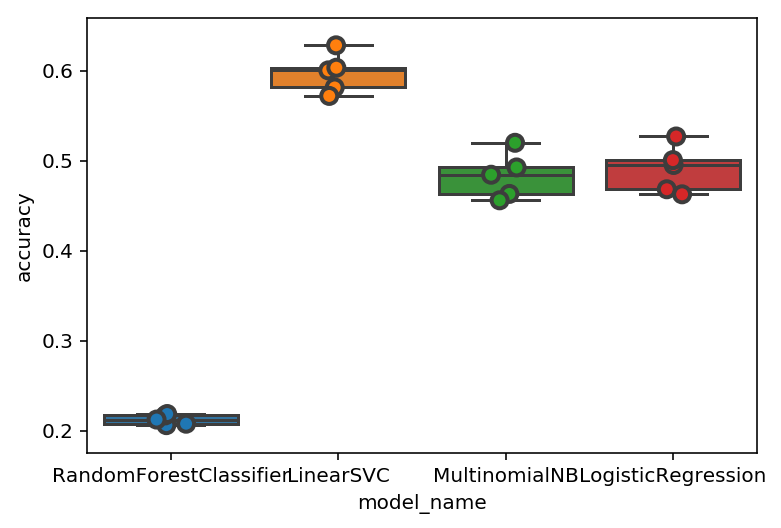

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [84]:
cv_df.groupby('model_name').accuracy.mean()


model_name
LinearSVC                 0.596968
LogisticRegression        0.490671
MultinomialNB             0.483106
RandomForestClassifier    0.212296
Name: accuracy, dtype: float64

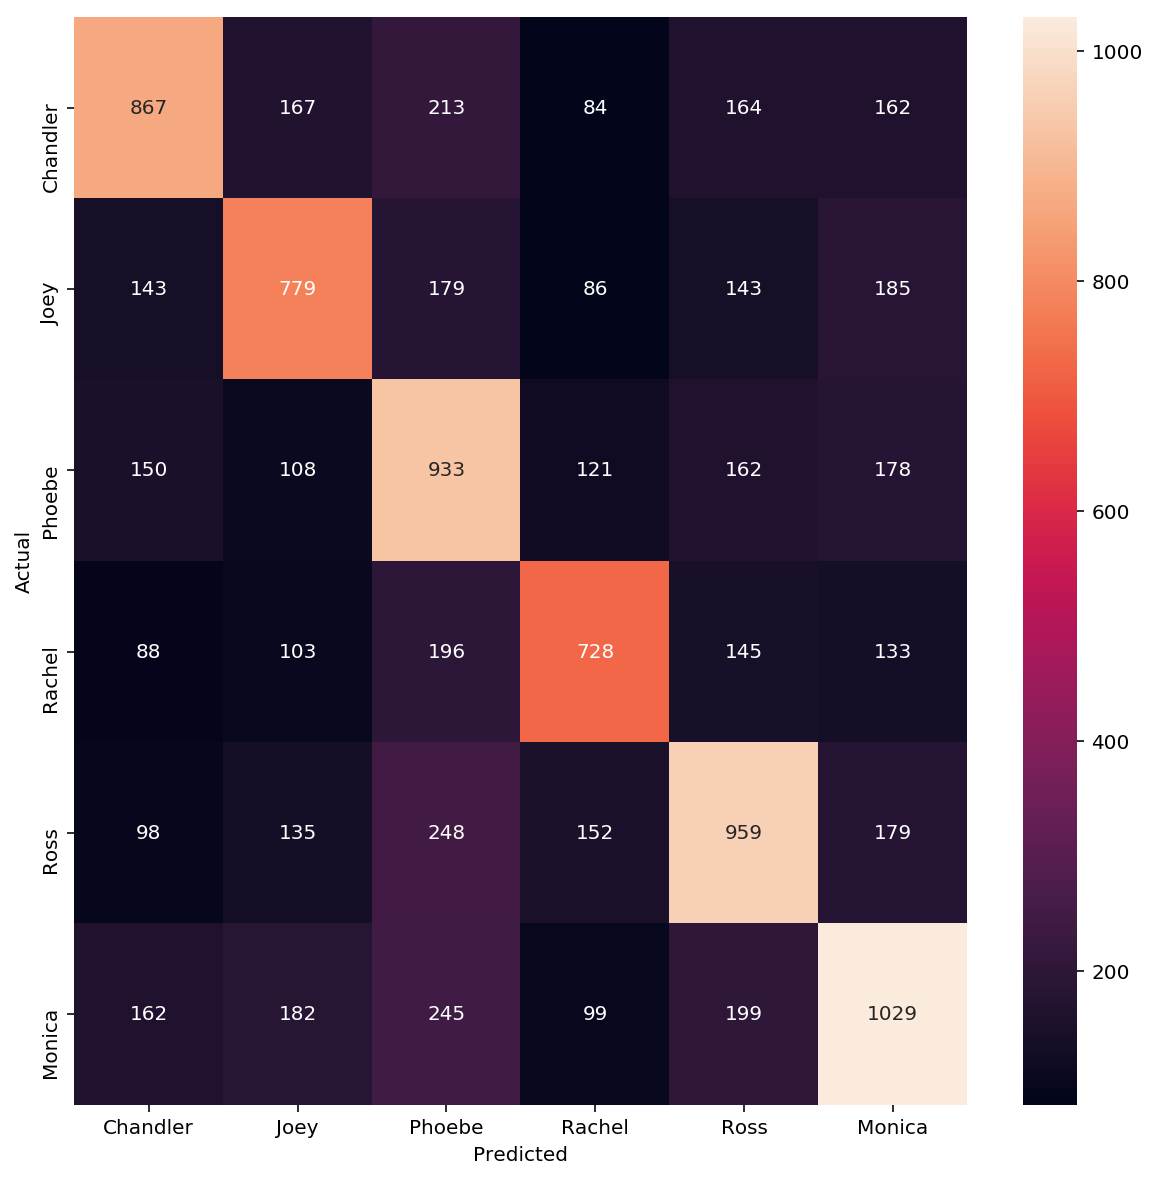

In [85]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Score.values, yticklabels=category_id_df.Score.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [86]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Score', 'dialogue']])
      print('')

'Joey' predicted as 'Chandler' : 143 examples.


,Score,dialogue



'Phoebe' predicted as 'Chandler' : 150 examples.


,Score,dialogue



'Rachel' predicted as 'Chandler' : 88 examples.


,Score,dialogue



'Ross' predicted as 'Chandler' : 98 examples.


,Score,dialogue



'Monica' predicted as 'Chandler' : 162 examples.


,Score,dialogue



'Chandler' predicted as 'Joey' : 167 examples.


,Score,dialogue



'Phoebe' predicted as 'Joey' : 108 examples.


,Score,dialogue



'Rachel' predicted as 'Joey' : 103 examples.


,Score,dialogue



'Ross' predicted as 'Joey' : 135 examples.


,Score,dialogue



'Monica' predicted as 'Joey' : 182 examples.


,Score,dialogue



'Chandler' predicted as 'Phoebe' : 213 examples.


,Score,dialogue



'Joey' predicted as 'Phoebe' : 179 examples.


,Score,dialogue



'Rachel' predicted as 'Phoebe' : 196 examples.


,Score,dialogue



'Ross' predicted as 'Phoebe' : 248 examples.


,Score,dialogue



'Monica' predicted as 'Phoebe' : 245 examples.


,Score,dialogue



'Chandler' predicted as 'Rachel' : 84 examples.


,Score,dialogue



'Joey' predicted as 'Rachel' : 86 examples.


,Score,dialogue



'Phoebe' predicted as 'Rachel' : 121 examples.


,Score,dialogue



'Ross' predicted as 'Rachel' : 152 examples.


,Score,dialogue



'Monica' predicted as 'Rachel' : 99 examples.


,Score,dialogue



'Chandler' predicted as 'Ross' : 164 examples.


,Score,dialogue



'Joey' predicted as 'Ross' : 143 examples.


,Score,dialogue



'Phoebe' predicted as 'Ross' : 162 examples.


,Score,dialogue



'Rachel' predicted as 'Ross' : 145 examples.


,Score,dialogue



'Monica' predicted as 'Ross' : 199 examples.


,Score,dialogue



'Chandler' predicted as 'Monica' : 162 examples.


,Score,dialogue



'Joey' predicted as 'Monica' : 185 examples.


,Score,dialogue



'Phoebe' predicted as 'Monica' : 178 examples.


,Score,dialogue



'Rachel' predicted as 'Monica' : 133 examples.


,Score,dialogue



'Ross' predicted as 'Monica' : 179 examples.


,Score,dialogue


In [87]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))


# 'Chandler':
  . Top unigrams:
       . friday
       . burst
  . Top bigrams:
       . don really
       . man sorry
# 'Joey':
  . Top unigrams:
       . jokes
       . marge
  . Top bigrams:
       . awful horrible
       . amazing know
# 'Monica':
  . Top unigrams:
       . flinging
       . grabbed
  . Top bigrams:
       . closes eyes
       . play anymore
# 'Phoebe':
  . Top unigrams:
       . richard
       . lasagne
  . Top bigrams:
       . oh turns
       . monica geller
# 'Rachel':
  . Top unigrams:
       . sergei
       . thermos
  . Top bigrams:
       . little brother
       . did pick
# 'Ross':
  . Top unigrams:
       . joshua
       . cart
  . Top bigrams:
       . rachel green
       . care don


In [88]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Score'].unique()))

              precision    recall  f1-score   support

    Chandler       0.57      0.52      0.55      1657
        Joey       0.53      0.51      0.52      1515
      Phoebe       0.46      0.56      0.51      1652
      Rachel       0.57      0.52      0.55      1393
        Ross       0.54      0.54      0.54      1771
      Monica       0.55      0.54      0.54      1916

    accuracy                           0.53      9904
   macro avg       0.54      0.53      0.54      9904
weighted avg       0.54      0.53      0.54      9904

